Code taken from **Deep Learning: An Introductionfor Applied Mathematicians** <br>
https://epubs.siam.org/doi/10.1137/18M1165748

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from time import time

In [2]:
def activate(x, W, b):
    # x should be of size (input X number of samples)
    return 1 / (1 + np.exp(-(np.matmul(W, x) + b)))

def cost(W2, W3, W4, b2, b3, b4):
    costvec = np.zeros(10)
    for i in range(10):
        x = x_full[:,i].reshape(input_size,-1)
        a2 = activate(x, W2, b2)
        a3 = activate(a2, W3, b3)
        a4 = activate(a3, W4, b4)
        costvec[i] = np.linalg.norm(y[:, i].reshape(input_size,-1) - a4, 2)
    return np.linalg.norm(costvec, 2)**2

In [3]:
x1 = np.array([[0.1, 0.3, 0.1, 0.6, 0.4, 0.6, 0.5, 0.9, 0.4, 0.7]])
x2 = np.array([[0.1, 0.4, 0.5, 0.9, 0.2, 0.3, 0.6, 0.2, 0.4, 0.6]])
y = np.array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])


In [4]:
x_full = np.concatenate((x1,x2),axis=0)
print(x_full)

[[0.1 0.3 0.1 0.6 0.4 0.6 0.5 0.9 0.4 0.7]
 [0.1 0.4 0.5 0.9 0.2 0.3 0.6 0.2 0.4 0.6]]


In [5]:
#np.random.seed(5000)
#W2 = 0.5 * np.random.randn(2, 2)
#W3 = 0.5 * np.random.randn(3, 2)
#W4 = 0.5 * np.random.randn(2, 3)
#b2 = 0.5 * np.random.randn(2, 1)
#b3 = 0.5 * np.random.randn(3, 1)
#b4 = 0.5 * np.random.randn(2, 1)

W2 = 0.5*np.array([[.1, .2], [.3, .4]])
W3 = 0.5*np.array([[-.1, .2], [-.3, .4], [.5, -.6]])
W4 = 0.5*np.array([[.1, -.2, .3], [-.4, -.5, .6]])
b2 = 0.5 * np.zeros((2, 1))
b3 = 0.5 * np.zeros((3, 1))
b4 = 0.5 * np.zeros((2, 1))

In [6]:
eta = 0.05  # learning rate
Niter = int(1e6)  # number of SG iterations
savecost = np.zeros(Niter)  # value of cost function at each iteration
input_size = 2

In [7]:
t0 = time()
#
for counter in range(Niter):
    k = np.random.randint(10)  # choose a training point at random
    x = x_full[:,k].reshape(input_size,-1)
    # Forward pass
    a2 = activate(x, W2, b2)
    a3 = activate(a2, W3, b3)
    a4 = activate(a3, W4, b4)
    # Backward pass
    delta4 = a4*(1 - a4)*(a4 - y[:, k].reshape(input_size,-1))
    delta3 = a3*(1 - a3)*np.matmul(W4.T,delta4)
    delta2 = a2*(1 - a2)*np.matmul(W3.T,delta3)
    # Gradient step
    W2 -= eta*np.outer(delta2, x)
    W3 -= eta*np.outer(delta3, a2)
    W4 -= eta*np.outer(delta4, a3)
    b2 -= eta*delta2
    b3 -= eta*delta3
    b4 -= eta*delta4
    # Monitor progress
    newcost = cost(W2, W3, W4, b2, b3, b4) 
    if counter%100000==0:
        print(newcost)
    savecost[counter] = newcost
print('time:',(time() - t0)/60,' min')

5.004137803264132
2.6006744167020632
0.11422698702115747
0.008517918278585687
0.0038570575116818745
0.0023893479890443534
0.001706439908132815
0.0013149565243824473
0.0010633327794674604
0.0008916258443538337
time: 12.945114835103352  min


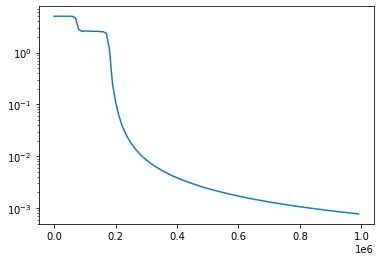

In [8]:
np.save('costvec.npy', savecost)
plt.semilogy(range(0, Niter, int(1e4)), savecost[::int(1e4)])
plt.show()

**Results**

(-0.1, 1.1)

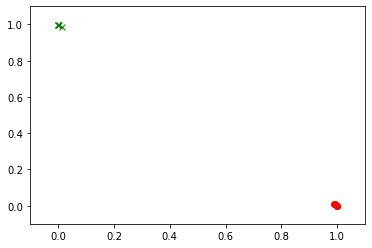

In [19]:
for k in range(5):
    x = x_full[:,k].reshape(input_size,-1)
    # Forward pass
    a2 = activate(x, W2, b2)
    a3 = activate(a2, W3, b3)
    a4 = activate(a3, W4, b4)
    plt.plot(a4[0],a4[1],'ro')
for k in range(5,10):
    x = x_full[:,k].reshape(input_size,-1)
    # Forward pass
    a2 = activate(x, W2, b2)
    a3 = activate(a2, W3, b3)
    a4 = activate(a3, W4, b4)
    plt.plot(a4[0],a4[1],'gx')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)